In [4]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [5]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

In [6]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

NameError: name 'sb' is not defined

In [40]:
#Import data
data = pd.read_csv('D:/shweta/Re-admission/re_ad2/read_cad.csv')
data.shape

(524, 12)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 12 columns):
PATIENT_ID                  524 non-null int64
PATIENT_LOCATION            524 non-null object
ADMITTING_CARE_PROVIDER     524 non-null object
CARE_PROVIDER_DEPARTNENT    524 non-null object
TEMPERATURE                 524 non-null float64
BLOOD PRESSURE              524 non-null object
BLOOD PRESSURE2             524 non-null int64
RESPIRATION                 524 non-null object
PULSE                       524 non-null int64
HEIGHT                      524 non-null object
WEIGHT                      524 non-null object
ReadmissionStatus           524 non-null int64
dtypes: float64(1), int64(4), object(7)
memory usage: 49.2+ KB


In [42]:
data.head()

,PATIENT_ID,PATIENT_LOCATION,ADMITTING_CARE_PROVIDER,CARE_PROVIDER_DEPARTNENT,TEMPERATURE,BLOOD PRESSURE,BLOOD PRESSURE2,RESPIRATION,PULSE,HEIGHT,WEIGHT,ReadmissionStatus
0,4671940,Mohali,Anil Prasad Bhatt,Nephrology,98.4,110,70,20,78,0,0,0
1,4740696,Mohali,Anil Prasad Bhatt,Nephrology,0.0,0,0,0,0,0,0,1
2,4752166,Mohali,Deepak Gupta,Neurology,0.0,0,0,0,0,0,0,0
3,4774764,Mohali,Anil Prasad Bhatt,Nephrology,98.2,130,70,0,0,0,0,0
4,4783689,Mohali,Virendar Sarwal,Cardiovascular Surgery,98.4,116,72,28,96,0,0,0


In [43]:
dataset1 = data.drop(['PATIENT_ID','ADMITTING_CARE_PROVIDER'], 1)
dataset1.head()

,PATIENT_LOCATION,CARE_PROVIDER_DEPARTNENT,TEMPERATURE,BLOOD PRESSURE,BLOOD PRESSURE2,RESPIRATION,PULSE,HEIGHT,WEIGHT,ReadmissionStatus
0,Mohali,Nephrology,98.4,110,70,20,78,0,0,0
1,Mohali,Nephrology,0.0,0,0,0,0,0,0,1
2,Mohali,Neurology,0.0,0,0,0,0,0,0,0
3,Mohali,Nephrology,98.2,130,70,0,0,0,0,0
4,Mohali,Cardiovascular Surgery,98.4,116,72,28,96,0,0,0


In [44]:
dataset=dataset1.convert_objects(convert_numeric=True)

C:\Users\shwetag\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


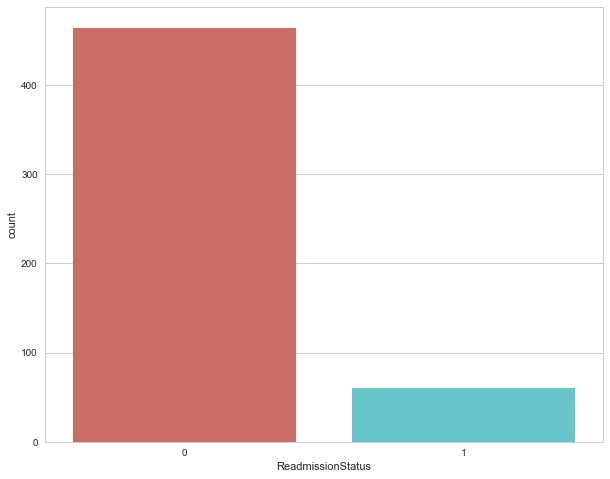

In [230]:
sb.countplot(x='ReadmissionStatus',data=dataset, palette='hls')

In [47]:
#treating missing value
attributes_to_replace_zero =list(dataset.columns[2:9]) 
dataset[attributes_to_replace_zero] = dataset[attributes_to_replace_zero].replace(0.0, np.NaN)
dataset.fillna(dataset.mean(), inplace=True) 
dataset.dropna(inplace=True)

In [237]:
p = pd.get_dummies(dataset['PATIENT_LOCATION'],drop_first=True)
p.head()

,Dehradun,Gurgaon,Mohali,Saket (DDF),Shalimar Bagh
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [238]:
c= pd.get_dummies(dataset['CARE_PROVIDER_DEPARTNENT'],drop_first=True)
c.head()

,Cardiology,Cardiovascular Surgery,Critical Care,ENT,Internal Medicine,Medical Gastroenterology,Nephrology,Neurology,Orthopedics,Pulmonology,Urology,Vascular Surgery
0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0


In [49]:
dataset.head()

,PATIENT_LOCATION,CARE_PROVIDER_DEPARTNENT,TEMPERATURE,BLOOD PRESSURE,BLOOD PRESSURE2,RESPIRATION,PULSE,HEIGHT,WEIGHT,ReadmissionStatus
0,Mohali,Nephrology,98.40000,110.000000,70.000000,20.000000,78.000000,63.1193,152.324167,0
1,Mohali,Nephrology,98.26469,122.510695,72.812332,20.644986,79.900804,63.1193,152.324167,1
2,Mohali,Neurology,98.26469,122.510695,72.812332,20.644986,79.900804,63.1193,152.324167,0
3,Mohali,Nephrology,98.20000,130.000000,70.000000,20.644986,79.900804,63.1193,152.324167,0
4,Mohali,Cardiovascular Surgery,98.40000,116.000000,72.000000,28.000000,96.000000,63.1193,152.324167,0


In [240]:
dataset.drop(['PATIENT_LOCATION','CARE_PROVIDER_DEPARTNENT'],axis=1,inplace=True)
dataset.head()

,TEMPERATURE,BLOOD PRESSURE,BLOOD PRESSURE2,RESPIRATION,PULSE,HEIGHT,WEIGHT,ReadmissionStatus
0,98.4,110.000000,70.000000,20.000000,78.000000,63.1193,152.324167,0
1,0.0,122.510695,72.812332,20.644986,79.900804,63.1193,152.324167,1
2,0.0,122.510695,72.812332,20.644986,79.900804,63.1193,152.324167,0
3,98.2,130.000000,70.000000,20.644986,79.900804,63.1193,152.324167,0
4,98.4,116.000000,72.000000,28.000000,96.000000,63.1193,152.324167,0


In [241]:
dataset_dmy = pd.concat([dataset,p,c],axis=1)
dataset_dmy.head()

,TEMPERATURE,BLOOD PRESSURE,BLOOD PRESSURE2,RESPIRATION,PULSE,HEIGHT,WEIGHT,ReadmissionStatus,Dehradun,Gurgaon,...,Critical Care,ENT,Internal Medicine,Medical Gastroenterology,Nephrology,Neurology,Orthopedics,Pulmonology,Urology,Vascular Surgery
0,98.4,110.000000,70.000000,20.000000,78.000000,63.1193,152.324167,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.0,122.510695,72.812332,20.644986,79.900804,63.1193,152.324167,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.0,122.510695,72.812332,20.644986,79.900804,63.1193,152.324167,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,98.2,130.000000,70.000000,20.644986,79.900804,63.1193,152.324167,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,98.4,116.000000,72.000000,28.000000,96.000000,63.1193,152.324167,0,0,0,...,0,0,0,0,0,0,0,0,0,0


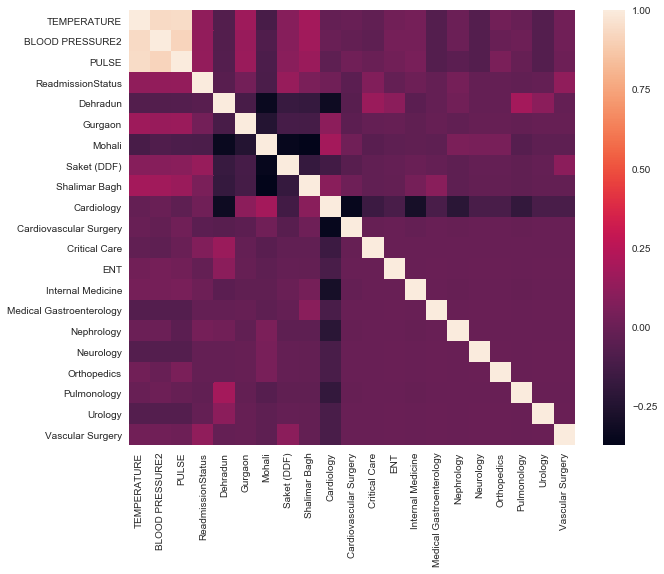

In [98]:
sb.heatmap(dataset_dmy.corr())

In [242]:
dataset_dmy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524 entries, 0 to 523
Data columns (total 25 columns):
TEMPERATURE                 524 non-null float64
BLOOD PRESSURE              524 non-null float64
BLOOD PRESSURE2             524 non-null float64
RESPIRATION                 524 non-null float64
PULSE                       524 non-null float64
HEIGHT                      524 non-null float64
WEIGHT                      524 non-null float64
ReadmissionStatus           524 non-null int64
Dehradun                    524 non-null uint8
Gurgaon                     524 non-null uint8
Mohali                      524 non-null uint8
Saket (DDF)                 524 non-null uint8
Shalimar Bagh               524 non-null uint8
Cardiology                  524 non-null uint8
Cardiovascular Surgery      524 non-null uint8
Critical Care               524 non-null uint8
ENT                         524 non-null uint8
Internal Medicine           524 non-null uint8
Medical Gastroenterology    524 non

In [254]:
dataset_dmy.to_csv('shweta2.csv')

In [6]:
data_new = pd.read_csv('D:/shweta/Re-admission/re_ad2/shweta.csv')
data_new.shape

(524, 25)

In [27]:
# Split into Input and Output.
attributes = list(data_new.columns[:25])
X = data_new[attributes].values 
y= data_new['ReadmissionStatus'].values

In [28]:
# Split into train and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)

In [29]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
y_pred = LogReg.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[94,  0],
       [ 0, 11]], dtype=int64)

In [32]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        94
          1       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00       105



In [33]:
 #Import suite of algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV

In [34]:
# Create objects of required models.
models = []
models.append(("LR",LogisticRegression()))
models.append(("GNB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("LDA",  LinearDiscriminantAnalysis()))
models.append(("QDA",  QuadraticDiscriminantAnalysis()))
models.append(("AdaBoost", AdaBoostClassifier()))
models.append(("SVM Linear",SVC(kernel="linear")))
models.append(("SVM RBF",SVC(kernel="rbf")))
models.append(("Random Forest",  RandomForestClassifier()))
models.append(("Bagging",BaggingClassifier()))
models.append(("Calibrated",CalibratedClassifierCV()))
models.append(("GradientBoosting",GradientBoostingClassifier()))
models.append(("LinearSVC",LinearSVC()))
models.append(("Ridge",RidgeClassifier()))

In [35]:
# Find accuracy of models.
results = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    results.append(tuple([name,cv_result.mean(), cv_result.std()]))
  
results.sort(key=lambda x: x[1], reverse = True)    
for i in range(len(results)):
    print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[i][0] , results[i][1] * 100, results[i][2] * 100))

C:\Users\shwetag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\shwetag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\shwetag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\shwetag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\shwetag\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\shwetag\AppData\Local\Continuum\anaconda3\lib\

LR                   100.00 (+/-) 0.00 
GNB                  100.00 (+/-) 0.00 
DecisionTree         100.00 (+/-) 0.00 
AdaBoost             100.00 (+/-) 0.00 
SVM Linear           100.00 (+/-) 0.00 
Random Forest        100.00 (+/-) 0.00 
Bagging              100.00 (+/-) 0.00 
GradientBoosting     100.00 (+/-) 0.00 
Ridge                100.00 (+/-) 0.00 
Calibrated           98.57 (+/-) 1.58 
KNN                  88.29 (+/-) 5.33 
QDA                  88.29 (+/-) 4.77 
SVM RBF              88.29 (+/-) 4.77 
LinearSVC            87.58 (+/-) 18.04 
LDA                  86.85 (+/-) 5.11 
